In [1]:
import numpy
%matplotlib widget
from matplotlib import pyplot
from functools import partial
from ipywidgets import interact, IntSlider
import tensorflow as tf

import sys
sys.path.append('../libs/')
import loss_metrics

In [9]:
z_neg = numpy.random.normal(-0.9, 1, 9000)
p_neg = 1 / (1 + numpy.exp(-z_neg))
z_pos = numpy.random.normal(0.9, 1, 1000)
p_pos = 1 / (1 + numpy.exp(-z_pos))
y_pred = numpy.concatenate([p_neg, p_pos])
y_true = numpy.concatenate([
    -numpy.ones(z_neg.shape[0]), 
    numpy.ones(z_pos.shape[0])
]).astype('int')
y_true, y_pred = tf.constant(y_true), tf.constant(y_pred)
y_true, y_pred = tf.expand_dims(y_true, 1), tf.expand_dims(y_pred, 1)
threshold = loss_metrics.precise_threshold(0, y_true, y_pred).numpy()
sensitivity = loss_metrics.precise_sensitivity(0, y_true, y_pred).numpy()

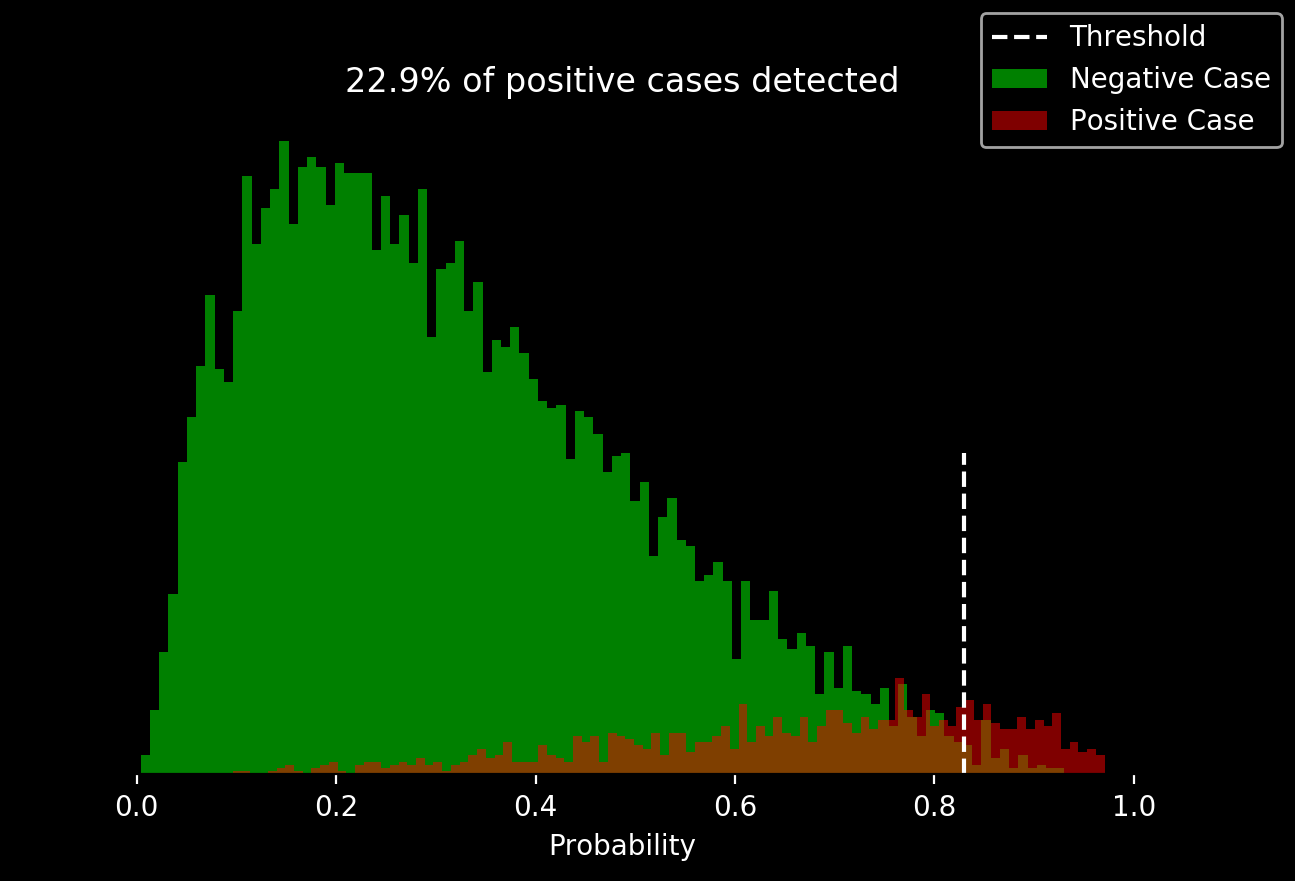

In [12]:
fig = pyplot.figure(0, facecolor='black')
fig.clear()
fig.gca().set_facecolor('black')
bins = pyplot.hist(p_neg, bins=100, alpha=1, color='green');
bins = pyplot.hist(p_pos, bins=100, alpha=.5, color='red');
pyplot.plot([threshold] * 2, [0, 100], '--w')
pyplot.xlabel('Probability', color='white')
fig.gca().tick_params(axis='x', colors='white')
legend = ['Threshold', 'Negative Case', 'Positive Case']
legend = fig.legend(legend, facecolor='black')
for text in legend.get_texts():
    text.set_color('white')
title = '{}% of positive cases detected'.format(round(sensitivity * 100, 1))
pyplot.title(title, color='white')
display(fig)